In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [3]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

Мержим данные

In [5]:
merged = orders.merge(customers, on='customer_id', how='left')
merged.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  
0                      3149                sao paulo             SP  
1                     47813                barreiras             BA  
2                     75265               vianopolis             GO  
3                     59296  sao goncalo do amarante             RN  
4                      9195              santo andre             SP

Ответ. кол-во пользователей, которые совершили покупку только один раз.

In [6]:
merged.loc[merged['order_status'] == 'delivered']     .groupby('customer_unique_id',as_index=0)     .agg({'order_id':'count'})     .query('order_id == 1')     .count().order_id

90557

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

Меняем тип данных на дейттайм.

In [7]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [8]:
avg_cancel = orders.query('order_status != "delivered"')    .groupby([pd.Grouper(freq='MS', key='order_purchase_timestamp'),'order_status'],as_index=0)     .agg({'order_id':'count'})     .groupby('order_status',as_index=0)    .agg({'order_id':'mean'})     .rename(columns={'order_id':'avg_value'})
avg_cancel

order_status  avg_value
0     approved   1.000000
1     canceled  26.041667
2      created   1.666667
3     invoiced  14.952381
4   processing  15.842105
5      shipped  48.130435
6  unavailable  29.000000

Ответ. график распределения причин отмены

Text(0, 0.5, 'Average value')

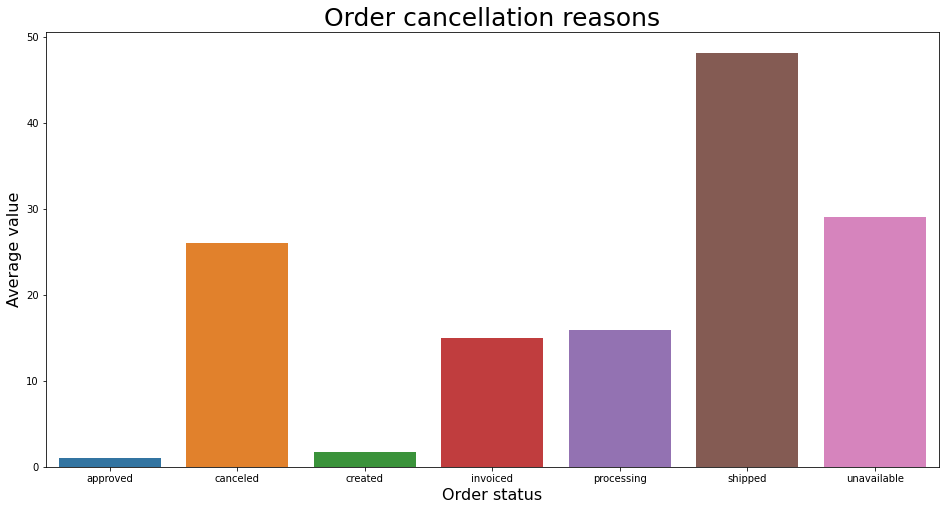

In [9]:
fig, scatter = plt.subplots(figsize = (16,8))
plt.title('Order cancellation reasons', fontsize = 25)
ax = sns.barplot(x = 'order_status', y = 'avg_value', 
              data = avg_cancel)
ax.set_xlabel('Order status', fontsize=16)
ax.set_ylabel('Average value', fontsize=16)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

Мержим данные

In [10]:
orders_items = orders.merge(order_items, how='left',on='order_id')     [['product_id','order_purchase_timestamp','order_status']]

Добавляем дни недели

In [11]:
orders_items.order_purchase_timestamp = orders.order_purchase_timestamp.dt.day_name()
orders_items = orders_items.rename(columns={'order_purchase_timestamp':'weekday'})
orders_items.head()

product_id    weekday order_status
0  87285b34884572647811a353c7ac498a     Monday    delivered
1  595fac2a385ac33a80bd5114aec74eb8    Tuesday    delivered
2  aa4383b373c6aca5d8797843e5594415  Wednesday    delivered
3  d0b61bfb1de832b15ba9d266ca96e5b0   Saturday    delivered
4  65266b2da20d04dbe00c5c2d3bb7859e    Tuesday    delivered

Считываем пустын значения.

In [12]:
orders_items.isna().sum()

product_id        775
weekday         13984
order_status        0
dtype: int64

Избавляемся от пустых значений

In [13]:
orders_items = orders_items.dropna()

Ответ. В какой день недели каждый товар чаще всего покупается

In [14]:
id_purchase_day = orders_items.query('order_status == "delivered"')     .groupby(['product_id','weekday'],as_index=0)     .agg({'order_status':'count'})     .drop_duplicates(subset=["product_id"])     .rename(columns={'weekday':'purchase_day'})
id_purchase_day.head()

product_id purchase_day  order_status
0  0009406fd7479715e4bef61dd91f2462      Tuesday             1
1  000b8f95fcb9e0096488278317764d19       Friday             1
2  000d9be29b5207b54e86aa1b1ac54872       Monday             1
3  0011c512eb256aa0dbbb544d8dffcf6e     Saturday             1
4  00126f27c813603687e6ce486d909d01       Monday             1

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? <br>
Не стоит забывать, что внутри месяца может быть не целое количество недель. (8 баллов)

In [16]:
uniq_customers = orders.merge(customers, on='customer_id', how='left')

Добавляем месяцы

In [17]:
uniq_customers['month'] = uniq_customers.order_purchase_timestamp.dt.month_name()
uniq_customers.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state     month  
0                      3149                sao paulo             SP   October  
1                     47813                barreiras             BA      July  
2                     75265               vianopolis             GO    August  
3                     59296  sao goncalo do amarante             RN  November  
4                      9195              santo andre             SP  February

In [18]:
uniq_customers['days_in_month'] = orders.order_purchase_timestamp.dt.days_in_month
uniq_customers['weeks'] = uniq_customers.days_in_month / 7
uniq_customers.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state     month  \
0                      3149                sao paulo             SP   October   
1                     47813                barreiras             BA      July   
2                     75265               vianopolis             GO    August   
3                     59296  sao goncalo do amarante             RN  November   
4                      9195              santo andre             SP  February   

   days_in_month     weeks  
0             31  4.428571  
1             31  4.428571  
2             31  4.428571  
3             30  4.285714  
4             28  4.000000

читаем среднее кол-во заказов по месяцам

In [19]:
cust_a_month = uniq_customers.query('order_status == "delivered"')     .groupby(['customer_unique_id','order_purchase_timestamp','weeks'], as_index=0).agg({'order_status':'count'})     .groupby(['customer_unique_id','order_purchase_timestamp','weeks'],as_index=0).agg({'order_status':'sum'})     .rename(columns={'order_purchase_timestamp':'month','order_status':'avg_orders'}) 

In [20]:
cust_a_month.head()

customer_unique_id               month     weeks  avg_orders
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27  4.428571           1
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27  4.428571           1
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03  4.428571           1
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41  4.428571           1
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42  4.285714           1

In [21]:
cust_a_month.avg_orders = cust_a_month.avg_orders / cust_a_month.weeks

5. Используя pandas, проведи когортный анализ пользователей. <br>
 период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

мержим данные по иннер джоину

In [22]:
uniq_orders = orders.merge(customers, on='customer_id')
uniq_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  
0                      3149                sao paulo             SP  
1                     47813                barreiras             BA  
2                     75265               vianopolis             GO  
3                     59296  sao goncalo do amarante             RN  
4                      9195              santo andre             SP

Оставляем завершенные заказы

In [23]:
delivered_uniq_orders = uniq_orders[uniq_orders.order_status == 'delivered']
delivered_uniq_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  
0                      3149                sao paulo             SP  
1                     47813                barreiras             BA  
2                     75265               vianopolis             GO  
3                     59296  sao goncalo do amarante             RN  
4                      9195              santo andre             SP

Меняем данные на месяц

In [24]:
delivered_uniq_orders['year_month'] = delivered_uniq_orders.order_purchase_timestamp.dt.to_period('M')
delivered_uniq_orders.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state year_month  
0                      3149                sao paulo             SP    2017-10  
1                     47813                barreiras             BA    2018-07  
2                     75265               vianopolis             GO    2018-08  
3                     59296  sao goncalo do amarante             RN    2017-11  
4                      9195              santo andre             SP    2018-02

Оставляем только нужные колонки. сортируем по месяца

In [25]:
delivered_uniq_orders = delivered_uniq_orders[['customer_unique_id','order_id','year_month']]
delivered_uniq_orders = delivered_uniq_orders.sort_values('year_month')
delivered_uniq_orders.head()

customer_unique_id                          order_id  \
30710  830d5b7aaa3b6f1e9ad63703bec97d23  bfbd0f9bdef84302105ad712db648a6c   
40692  2e15add79c76241beffe812a24ad3a31  cb29497c3782a76b57327c055d58b0e0   
24708  d6a930873ee3f80aa823cb1d4baca58d  0ca768c507d1fc3c61bd950bb1c5231a   
94421  f7ace36f8a10c4b2ede9ea7708e01454  2e8e21db96a8ab922e51cd297678c6b2   
53268  4a6959f9a4aca95bb3733032d0a50c9e  25f680bf746bec3df11d48318ff015de   

      year_month  
30710    2016-09  
40692    2016-10  
24708    2016-10  
94421    2016-10  
53268    2016-10

Группируем по кастомерам и берем первый заказ

In [26]:
first_order = delivered_uniq_orders.groupby('customer_unique_id',as_index=0)     .agg({'year_month':'first'})
first_order.head()

customer_unique_id year_month
0  0000366f3b9a7992bf8c76cfdf3221e2    2018-05
1  0000b849f77a49e4a4ce2b2a4ca5be3f    2018-05
2  0000f46a3911fa3c0805444483337064    2017-03
3  0000f6ccb0745a6a4b88665a16c9f078    2017-10
4  0004aac84e0df4da2b147fca70cf8255    2017-11

Мержим датасет с первым заказом

In [27]:
delivered_uniq_orders = delivered_uniq_orders.merge(first_order,on='customer_unique_id')    .rename(columns={'year_month_x':'year_month','year_month_y':'first_date'})
delivered_uniq_orders.head()

customer_unique_id                          order_id  \
0  830d5b7aaa3b6f1e9ad63703bec97d23  bfbd0f9bdef84302105ad712db648a6c   
1  2e15add79c76241beffe812a24ad3a31  cb29497c3782a76b57327c055d58b0e0   
2  d6a930873ee3f80aa823cb1d4baca58d  0ca768c507d1fc3c61bd950bb1c5231a   
3  f7ace36f8a10c4b2ede9ea7708e01454  2e8e21db96a8ab922e51cd297678c6b2   
4  4a6959f9a4aca95bb3733032d0a50c9e  25f680bf746bec3df11d48318ff015de   

  year_month first_date  
0    2016-09    2016-09  
1    2016-10    2016-10  
2    2016-10    2016-10  
3    2016-10    2016-10  
4    2016-10    2016-10

In [28]:
delivered_uniq_orders = delivered_uniq_orders.groupby(['first_date','year_month'])     .agg({'customer_unique_id':'count'})

In [29]:
delivered_uniq_orders

customer_unique_id
first_date year_month                    
2016-09    2016-09                      1
2016-10    2016-10                    265
           2017-04                      1
           2017-07                      1
           2017-09                      1
...                                   ...
2018-06    2018-07                     25
           2018-08                     16
2018-07    2018-07                   6007
           2018-08                     31
2018-08    2018-08                   6180

[219 rows x 1 columns]

обавляем функцию для подсчета когорта

In [32]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

In [33]:
delivered_uniq_orders = delivered_uniq_orders.groupby(level=0).apply(cohort_period)
delivered_uniq_orders.head()

customer_unique_id  cohort_period
first_date year_month                                   
2016-09    2016-09                      1              1
2016-10    2016-10                    265              1
           2017-04                      1              2
           2017-07                      1              3
           2017-09                      1              4

In [34]:
delivered_uniq_orders = delivered_uniq_orders .pivot_table(columns='cohort_period', index = 'first_date',values='customer_unique_id')

In [35]:
base = delivered_uniq_orders[1]

In [36]:
retention = delivered_uniq_orders.divide(base, axis=0).round(4)

In [37]:
retention

cohort_period   1       2       3       4       5       6       7       8   \
first_date                                                                   
2016-09        1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2016-10        1.0  0.0038  0.0038  0.0038  0.0038  0.0038  0.0038  0.0075   
2016-12        1.0  1.0000     NaN     NaN     NaN     NaN     NaN     NaN   
2017-01        1.0  0.0027  0.0027  0.0013  0.0040  0.0013  0.0040  0.0013   
2017-02        1.0  0.0018  0.0030  0.0012  0.0042  0.0012  0.0024  0.0018   
2017-03        1.0  0.0047  0.0035  0.0047  0.0035  0.0016  0.0016  0.0031   
2017-04        1.0  0.0066  0.0026  0.0022  0.0026  0.0026  0.0039  0.0031   
2017-05        1.0  0.0048  0.0045  0.0028  0.0028  0.0034  0.0045  0.0014   
2017-06        1.0  0.0052  0.0042  0.0042  0.0032  0.0039  0.0036  0.0023   
2017-07        1.0  0.0058  0.0034  0.0024  0.0034  0.0021  0.0031  0.0010   
2017-08        1.0  0.0070  0.0039  0.0027  0.0034  0.0056  0.0029  0.0027   
2017-09        1.0  0.0069  0.0054  0.0037  0.0044  0.0032  0.0022  0.0025   
2017-10        1.0  0.0075  0.0025  0.0009  0.0025  0.0021  0.0021  0.0039   
2017-11        1.0  0.0059  0.0038  0.0017  0.0017  0.0020  0.0013  0.0018   
2017-12        1.0  0.0020  0.0030  0.0037  0.0026  0.0020  0.0017  0.0002   
2018-01        1.0  0.0033  0.0036  0.0029  0.0029  0.0017  0.0017  0.0023   
2018-02        1.0  0.0034  0.0040  0.0030  0.0025  0.0022  0.0020     NaN   
2018-03        1.0  0.0039  0.0034  0.0031  0.0012  0.0012     NaN     NaN   
2018-04        1.0  0.0059  0.0030  0.0024  0.0015     NaN     NaN     NaN   
2018-05        1.0  0.0053  0.0026  0.0018     NaN     NaN     NaN     NaN   
2018-06        1.0  0.0042  0.0027     NaN     NaN     NaN     NaN     NaN   
2018-07        1.0  0.0052     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08        1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_period      9       10      11      12      13      14      15      16  \
first_date                                                                      
2016-09           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2016-10        0.0075     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2016-12           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017-01        0.0013  0.0040  0.0013  0.0067  0.0040  0.0013  0.0013  0.0027   
2017-02        0.0012  0.0018  0.0012  0.0030  0.0012  0.0018  0.0012  0.0006   
2017-03        0.0031  0.0008  0.0035  0.0012  0.0020  0.0012  0.0016  0.0024   
2017-04        0.0031  0.0018  0.0026  0.0009  0.0004  0.0004  0.0009  0.0009   
2017-05        0.0026  0.0031  0.0026  0.0034  0.0023  0.0003  0.0017  0.0020   
2017-06        0.0013  0.0019  0.0029  0.0039  0.0016  0.0019  0.0032     NaN   
2017-07        0.0021  0.0029  0.0021  0.0031  0.0013  0.0024     NaN     NaN   
2017-08        0.0015  0.0015  0.0024  0.0019  0.0012     NaN     NaN     NaN   
2017-09        0.0027  0.0017  0.0025  0.0007     NaN     NaN     NaN     NaN   
2017-10        0.0030  0.0018  0.0021     NaN     NaN     NaN     NaN     NaN   
2017-11        0.0013  0.0006     NaN     NaN     NaN     NaN     NaN     NaN   
2017-12        0.0019     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-01           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-02           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-03           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-04           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-06           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-07           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2018-08           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_period      17  

In [38]:
retention[retention[3] == retention[3].max()].index

PeriodIndex(['2017-09'], dtype='period[M]', name='first_date', freq='M')

Ответ. максимальный ретеншн сентябрь 2017

Text(0.5, 1.0, 'Retention Rate')

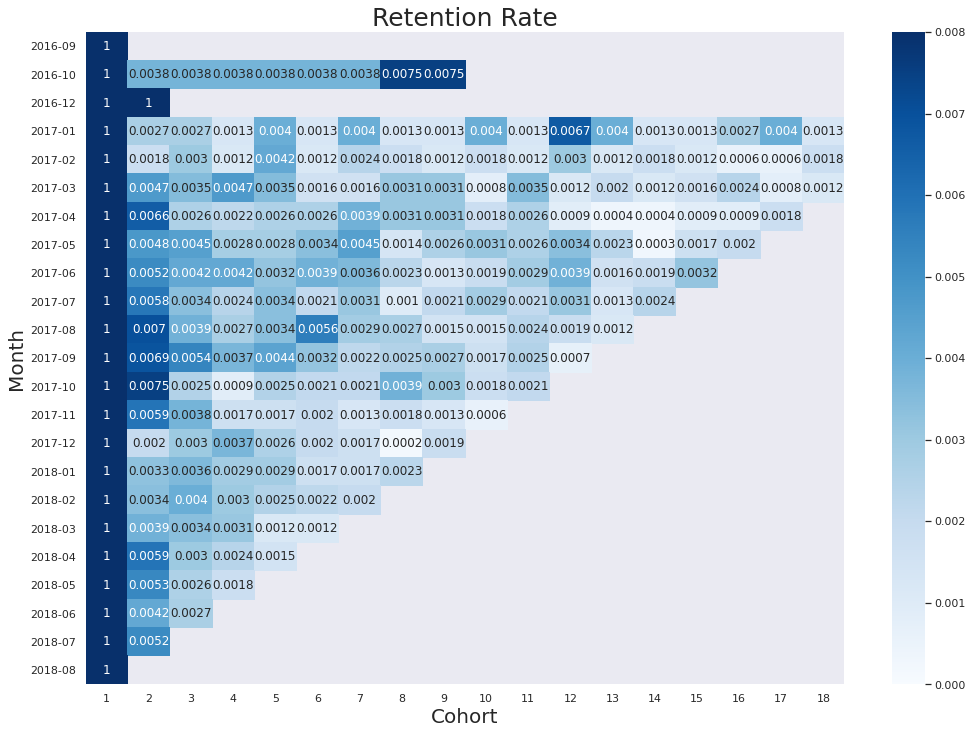

In [40]:
sns.set(rc={'figure.figsize':(17,12)})
ax = sns.heatmap(data=retention, annot=True, vmin=0.0,vmax=0.008, cmap='Blues')
ax.set_xlabel('Cohort',fontsize=20);
ax.set_ylabel('Month',fontsize=20);
ax.set_title('Retention Rate', fontsize=25)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. <br>
спользуя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. <br>
 кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, <br>
 - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. <br>
одробно опиши, как ты создавал кластеры. <br>
ля каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

мерджим датафреймы

In [ ]:
orders_uniq_rfm = orders.merge(customers, on='customer_id', how='left')
orders_uniq_id_rfm = orders_uniq_rfm.merge(order_items, how='left', on='order_id')
orders_uniq_id_rfm.head()

In [ ]:
orders_uniq_id_rfm = orders_uniq_id_rfm[orders_uniq_id_rfm.order_status == 'delivered']

берем нужные колонки

In [ ]:
orders_uniq_id_RFM = orders_uniq_id_rfm[['customer_unique_id','order_id','order_purchase_timestamp','price']]
orders_uniq_id_RFM.head()

зменят тип даты

In [ ]:
orders_uniq_id_RFM.order_purchase_timestamp = pd.to_datetime(orders_uniq_id_RFM.order_purchase_timestamp)

считаем разницу между датой нынешней и датой последнего заказа

In [ ]:
orders_uniq_id_RFM['time_delta'] = orders_uniq_id_RFM.order_purchase_timestamp     - orders_uniq_id_RFM.order_purchase_timestamp.max()
orders_uniq_id_RFM.head()

In [ ]:
orders_uniq_id_RFM['time_delta'].min()

In [ ]:
orders_uniq_id_RFM['time_delta'].describe()

In [ ]:
orders_uniq_id_RFM['time_delta'].quantile(0.934)

In [ ]:
orders_uniq_id_RFM['time_delta'].quantile(0.809)

In [ ]:
orders_uniq_id_RFM['r_score'] = pd.qcut(orders_uniq_id_RFM['time_delta'],q = [0,0.809,0.934,1] , labels=[1,2,3])
# сегментируем r-score поделив на 3 значения до 30 дней(1 месяц), до 90 дней, более 90 дней
orders_uniq_id_RFM.head()

мерджим результат r-score к итоговой колонке

In [ ]:
orders_uniq_id = orders.merge(customers, on='customer_id', how='left') 
orders_uniq_id.head()

считаем кол-во выполненых заказов для каждого пользователя

In [ ]:
x = orders_uniq_id.loc[orders_uniq_id['order_status'] == 'delivered']     .groupby('customer_unique_id',as_index=0)     .agg({'order_id':'count'})
x.head()

In [ ]:
orders_uniq_id_RFM.customer_unique_id = orders_uniq_id_RFM.customer_unique_id.drop_duplicates()
orders_uniq_id_RFM = orders_uniq_id_RFM.dropna()

мерджим результат к итоговой коллонке

In [ ]:
orders_uniq_id_RFM = orders_uniq_id_RFM.merge(x,how='left', on='customer_unique_id')
orders_uniq_id_RFM.head()

сегментируем f-score, 1 если 1 заказ, 2 если 2 заказа , 3 если более 2 заказов

In [ ]:
orders_uniq_id_RFM['f_score'] = orders_uniq_id_RFM.order_id_y.apply(lambda x: 3 if x > 2 else x)
orders_uniq_id_RFM.head()

In [ ]:
orders_uniq_id_RFM.f_score.value_counts()

In [ ]:
delivered_order_id = orders[orders['order_status'] == 'delivered']

считаем суммарный заработок на пользователях

In [ ]:
y = orders_uniq_id_rfm.groupby('customer_unique_id',as_index=0)     .agg({'price':'sum'})
y.head()

сегментируем 3 группа sum  154, 2 группа от 89.73 до 154 , остальное 1 группа

In [ ]:
y['m_score'] = y.price.apply(lambda x: 3 if x > 154 else 2 if 154 > x and x > 89.73 else 1)
y.head()

мерджим m-score к основному датасету

In [ ]:
orders_uniq_id_RFM = orders_uniq_id_RFM.merge(y, how='left', on='customer_unique_id')
orders_uniq_id_RFM.head()

оставим нужные коллонки

In [ ]:
orders_uniq_id_RFM = orders_uniq_id_RFM[['customer_unique_id','r_score','f_score','m_score']]
orders_uniq_id_RFM.head()

In [ ]:
orders_uniq_id_RFM.m_score.value_counts()

формируем итоговый RFM показатель

In [ ]:
orders_uniq_id_RFM['RFM'] = orders_uniq_id_RFM.r_score.astype(str)     +orders_uniq_id_RFM.f_score.astype(str)     +orders_uniq_id_RFM.m_score.astype(str)
orders_uniq_id_RFM.head()